In [1]:
import pickle
import os
import datetime
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '../../data/'

In [3]:
govenor_path = '../../data/govenors_tweets/'

In [4]:
senate_path = '../../data/senators_tweets/'

In [5]:
house_path = '../../data/us_representatives_tweets/'

In [6]:
potus_path = '../../data/POTUS_tweets/'

In [7]:
os.listdir(potus_path)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/POTUS_tweets/'

In [8]:
house_rep_screennames = pickle.load(open(data_path+'house_rep_screennames.p', 'rb'))

In [9]:
house_dem_screennames = pickle.load(open(data_path+'house_dem_screennames.p', 'rb'))

In [10]:
senate_dem_screennames = pickle.load(open(data_path+'senate_dem_screennames.p', 'rb'))

In [11]:
senate_rep_screennames = pickle.load(open(data_path+'senate_rep_screennames.p', 'rb'))

In [12]:
govenor_rep_screennames = pickle.load(open(data_path+'govenor_rep_screennames.p', 'rb'))

In [13]:
govenor_dem_screennames = pickle.load(open(data_path+'govenor_dem_screennames.p', 'rb'))

In [14]:
potus_screennames = ['realDonaldTrump']

In [15]:
def preprocess_text(text):
    # remove links
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    return text

## How many does each chamber post

In [16]:
def count_chamber_post(file_path, screenname_list):
    tweet_cnt = 0
    for name in screenname_list:
        try:
            file_name = os.path.join(file_path, '2020-07-22','{}_tweets.p'.format(name))
            tweets = pickle.load(open(file_name, 'rb'))
            for tweet in tweets:
                if tweet.created_at > datetime.datetime(2020, 2, 1):
                    tweet_cnt += 1
        except Exception as ex:
            print(ex)
    return tweet_cnt

In [17]:
senate_rep_cnt = count_chamber_post(senate_path, senate_rep_screennames)
print(senate_rep_cnt, senate_rep_cnt/len(senate_rep_screennames))

[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/ChuckGrassley_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/SenSasse_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/lisamurkowski_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/SenToomey_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/SteveDaines_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/marcorubio_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/MikeCrapo_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/JimInhofe_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/RoyBlunt_tweets.p'
[Errno 2] No such file or directory: '../../data/senators_tweets/2020-07-22/SenJohnHoeven_tweets.p'
[Errno 2] No such file or d

In [20]:
senate_dem_cnt = count_chamber_post(senate_path, senate_dem_screennames)
print(senate_dem_cnt, senate_dem_cnt/len(senate_dem_screennames))

38539 819.9787234042553


In [21]:
house_rep_cnt = count_chamber_post(house_path, house_rep_screennames)
print(house_rep_cnt, house_rep_cnt/len(house_rep_screennames))

[Errno 2] No such file or directory: '../../data/us_representatives_tweets/2020-07-22/RepRatcliffe_tweets.p'
108095 420.6031128404669


In [22]:
house_dem_cnt = count_chamber_post(house_path, house_dem_screennames)
print(house_dem_cnt, house_dem_cnt/len(house_dem_screennames))

[Errno 2] No such file or directory: '../../data/us_representatives_tweets/2020-07-22/RepCummings_tweets.p'
205746 653.1619047619048


In [23]:
govenor_rep_cnt = count_chamber_post(govenor_path, govenor_rep_screennames)
print(govenor_rep_cnt, govenor_rep_cnt/len(govenor_rep_screennames))

23397 899.8846153846154


In [24]:
govenor_dem_cnt = count_chamber_post(govenor_path, govenor_dem_screennames)
print(govenor_dem_cnt, govenor_dem_cnt/len(govenor_dem_screennames))

30398 1085.642857142857


In [29]:
165129/(len(senate_rep_screennames)+len(house_rep_screennames)+len(govenor_rep_screennames))

489.99703264094956

In [28]:
274683/(len(senate_dem_screennames)+len(house_dem_screennames)+len(govenor_dem_screennames))

704.3153846153846

### How many does each politician post

In [33]:
def count_politician_post(file_path, screenname_list):
    cnt_dict = {}
    for name in screenname_list:
        cnt = 0
        try:
            file_name = os.path.join(file_path, '2020-07-22','{}_tweets.p'.format(name))
            tweets = pickle.load(open(file_name, 'rb'))
            for tweet in tweets:
                if tweet.created_at > datetime.datetime(2020, 2, 1):
                    cnt += 1
        except Exception as ex:
            print(ex)
        cnt_dict[name] = cnt
    return cnt_dict

In [72]:
trump_tweets = []
file_name = os.path.join(potus_path, '2020-07-22','realDonaldTrump_tweets.p')
tweets = pickle.load(open(file_name, 'rb'))
for tweet in tweets:
    if tweet.created_at > datetime.datetime(2020, 2, 1):
        text = tweet.full_text
        trump_tweets.append(text)

In [75]:
trump_len = [len(item.split()) for item in trump_tweets]

In [78]:
sum(trump_len)/len(trump_len)

21.690635451505017

In [63]:
trump

{'realDonaldTrump': 1196}

In [18]:
# collect_tweet_text(rep_screennames)

In [19]:
# sp_tokens = ['de', 'la', 's', 'm', 'las', 'los', 'p', 've', 'en', 're', 'del', 't', 'que' ]

In [97]:
len(collect_tweet_text(senate_path, senate_rep_screennames))

54

In [64]:
rep_count_dic = {}
rep_count_dic.update(count_politician_post(senate_path, senate_rep_screennames))
rep_count_dic.update(count_politician_post(house_path, house_rep_screennames))
rep_count_dic.update(count_politician_post(govenor_path, govenor_rep_screennames))
rep_count_dic.update(count_politician_post(potus_path, potus_screennames))

[Errno 2] No such file or directory: '../../data/us_representatives_tweets/2020-07-22/RepRatcliffe_tweets.p'


In [66]:
pickle.dump(rep_count_dic, open('rep_count_dic.p','wb'))

In [36]:
# dem_count_dic = {}
# dem_count_dic.update(collect_tweet_text(senate_path, senate_dem_screennames))
# dem_count_dic.update(collect_tweet_text(house_path, house_dem_screennames))
# dem_count_dic.update(collect_tweet_text(govenor_path, govenor_dem_screennames))

In [37]:
# pickle.dump(dem_count_dic, open('dem_count_dic.p','wb'))

### Plot

In [18]:
rep_count_dic = pickle.load(open('rep_count_dic.p', 'rb'))
dem_count_dic = pickle.load(open('dem_count_dic.p', 'rb'))


In [19]:
rep_text = pickle.load(open('../../data/all_tweet_texts_rep.p', 'rb'))
dem_text = pickle.load(open('../../data/all_tweet_texts_dem.p', 'rb'))

In [20]:
rep_text_len = [len(line.split()) for line in rep_text.Text.tolist()]
dem_text_len = [len(line.split()) for line in dem_text.Text.tolist()]

In [21]:
rep_text.head(2)

,Text,Time
0,RT @WhiteHouse: LIVE: President @realDonaldTru...,2020-07-22 21:51:18
1,RT @TeamTrump: President @realDonaldTrump on O...,2020-07-22 20:45:37


In [22]:
max(rep_text_len), max(dem_text_len)

(67, 80)

In [23]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [24]:
rep_count_dic.values()

dict_values([466, 2, 1041, 151, 423, 1297, 665, 627, 771, 313, 917, 376, 1734, 1254, 960, 330, 335, 434, 64, 281, 655, 295, 214, 834, 632, 738, 340, 3221, 836, 657, 280, 430, 846, 651, 780, 198, 333, 858, 1500, 354, 1056, 534, 648, 375, 501, 1127, 443, 240, 332, 633, 315, 0, 463, 569, 548, 235, 272, 179, 1036, 54, 32, 336, 1025, 59, 178, 257, 122, 131, 811, 751, 208, 470, 211, 582, 151, 319, 305, 225, 317, 370, 911, 1209, 477, 200, 728, 311, 150, 31, 1813, 357, 238, 347, 207, 703, 226, 401, 214, 192, 767, 462, 595, 1116, 418, 447, 292, 135, 267, 597, 789, 331, 252, 27, 98, 154, 97, 473, 29, 329, 181, 484, 238, 198, 335, 661, 187, 44, 331, 1249, 124, 439, 208, 234, 96, 124, 150, 545, 324, 900, 246, 1263, 146, 699, 391, 83, 326, 0, 617, 353, 266, 366, 668, 356, 733, 81, 202, 411, 382, 104, 337, 475, 565, 48, 235, 411, 375, 204, 349, 174, 426, 682, 93, 121, 343, 406, 792, 228, 288, 268, 123, 376, 678, 271, 557, 154, 300, 551, 655, 351, 423, 361, 57, 0, 122, 523, 3194, 116, 396, 690, 158, 

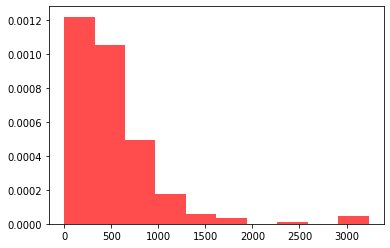

In [25]:
a,b,c = plt.hist(rep_count_dic.values(), color='red', alpha=0.7, label='Republican', density=True, bins=10,stacked=True)


In [26]:
b

array([   0. ,  323.4,  646.8,  970.2, 1293.6, 1617. , 1940.4, 2263.8,
       2587.2, 2910.6, 3234. ])

In [27]:
sum([a[i]*b[i] for i in range(10)])

1.1103202846975089

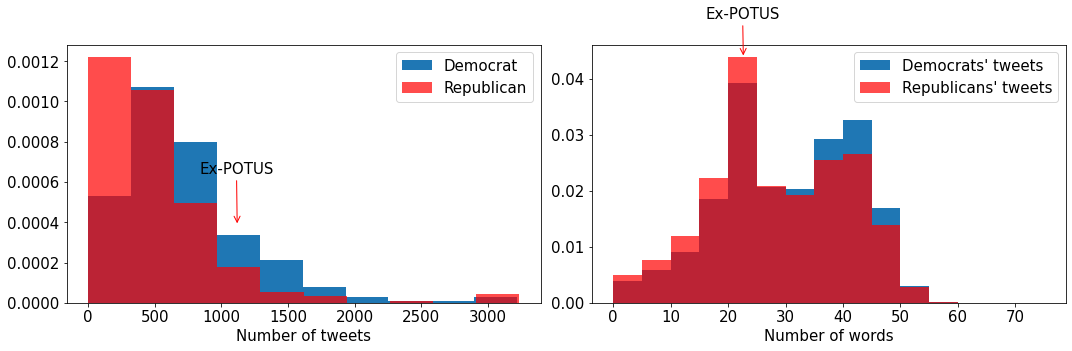

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.hist(dem_count_dic.values(), label='Democrat', density=True, bins=10)
ax1.hist(rep_count_dic.values(), color='red', alpha=0.7, label='Republican', density=True, bins=10)
ax1.legend( prop={'size': 15})
ax1.set_xlabel('Number of tweets', fontsize=15)
# ax1.set_ylabel('Number of politicians', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.annotate('Ex-POTUS',fontsize=15, xy=(0.36, 0.3), xycoords='axes fraction', xytext=(0.28, 0.5), 
            arrowprops=dict(arrowstyle="->", color='r'))

ax2.hist(dem_text_len, label='Democrats\' tweets', bins=range(0,80,5), density=True)
ax2.hist(rep_text_len, color='red', alpha=0.7, label='Republicans\' tweets', bins=range(0,80,5), density=True)
# ax2.set_yscale('log')
ax2.legend( prop={'size': 15})
ax2.set_xlabel('Number of words', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
# ax2.set_ylabel('Number of politicians', fontsize=15)
ax2.annotate('Ex-POTUS',fontsize=15, xy=(0.32, 0.95), xycoords='axes fraction', xytext=(0.24, 1.1), 
            arrowprops=dict(arrowstyle="->", color='r'))

plt.tight_layout()
plt.savefig('dist_figs.pdf', format='pdf')

(array([1.8971e+04, 9.4996e+04, 6.4842e+04, 9.5790e+04, 7.4000e+01,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([  0. ,  77.8, 155.6, 233.4, 311.2, 389. , 466.8, 544.6, 622.4,
        700.2, 778. ]),
 <a list of 10 Patch objects>)

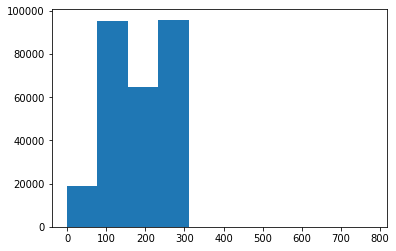

In [54]:
plt.hist(dem_text_len, label='Democrats\' tweets', bins=10)

In [50]:
a,b,c = ax2.hist(dem_text_len, label='Democrats\' tweets', bins=10)


In [51]:
d,e,f = ax2.hist(rep_text_len, color='red', alpha=0.7, label='Republicans\' tweets', bins=10)

In [52]:
a

array([1.8971e+04, 9.4996e+04, 6.4842e+04, 9.5790e+04, 7.4000e+01,
       2.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 4.0000e+00])